A simple tutorial to determine if someone will default on their loan. The dataset was obtained from The Lending Club and posted to Kaggle https://www.kaggle.com/wendykan/lending-club-loan-data 

Have a look at the Kaggle page for a detaled desc

In [17]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
#### Step 1 load data 
loan  = pd.read_csv("loan.csv")
print(loan.info())

/home/mbcxjhr2/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835922 non-null object
emp_length                     887379 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

In [3]:
##### Step 2 - Data preprocessing

#---- a. determine nan percentage and remove
check_null = loan.isnull().sum().sort_values(ascending=False)/len(loan)
#print all with 20% NaNs
print(check_null[check_null > 0.2])

dti_joint                      0.999426
verification_status_joint      0.999424
annual_inc_joint               0.999424
il_util                        0.979020
mths_since_rcnt_il             0.976549
all_util                       0.975916
max_bal_bc                     0.975916
open_rv_24m                    0.975916
open_rv_12m                    0.975916
total_cu_tl                    0.975916
total_bal_il                   0.975916
open_il_24m                    0.975916
open_il_12m                    0.975916
open_il_6m                     0.975916
open_acc_6m                    0.975916
inq_fi                         0.975916
inq_last_12m                   0.975916
desc                           0.857976
mths_since_last_record         0.845553
mths_since_last_major_derog    0.750160
mths_since_last_delinq         0.511971
next_pymnt_d                   0.285077
dtype: float64


In [4]:
#let's remove these
loan.drop(check_null[check_null > 0.2].index, axis=1, inplace=True)
loan.dropna(axis=0, thresh=30,inplace=True)

In [5]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,Jan-2015,171.62,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,Apr-2013,119.66,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,Jun-2014,649.91,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,Jan-2015,357.48,Jan-2015,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,Jan-2016,67.79,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN


**There are a lot of columns. Let's use:  loan_amnt, installment, term, int_rate, grade**

In [6]:
data = loan[['loan_amnt','installment','term','int_rate','grade','loan_status']]

In [7]:
data.head()

,loan_amnt,installment,term,int_rate,grade,loan_status
0,5000.0,162.87,36 months,10.65,B,Fully Paid
1,2500.0,59.83,60 months,15.27,C,Charged Off
2,2400.0,84.33,36 months,15.96,C,Fully Paid
3,10000.0,339.31,36 months,13.49,C,Fully Paid
4,3000.0,67.79,60 months,12.69,B,Current


In [8]:
#The target for this exercise is the 'loan_status' column
print(data['loan_status'].value_counts()/len(data))

Current                                                0.678153
Fully Paid                                             0.234086
Charged Off                                            0.050991
Late (31-120 days)                                     0.013062
Issued                                                 0.009534
In Grace Period                                        0.007047
Late (16-30 days)                                      0.002656
Does not meet the credit policy. Status:Fully Paid     0.002240
Default                                                0.001374
Does not meet the credit policy. Status:Charged Off    0.000858
Name: loan_status, dtype: float64


**The aim of this tutorial is to determine whether some one will default on their loan. Thus we will ignore current customers**

In [9]:
data = data[data['loan_status'] != 'Current']
print(data['loan_status'].value_counts()/len(data))

Fully Paid                                             0.727321
Charged Off                                            0.158431
Late (31-120 days)                                     0.040585
Issued                                                 0.029622
In Grace Period                                        0.021894
Late (16-30 days)                                      0.008253
Does not meet the credit policy. Status:Fully Paid     0.006961
Default                                                0.004268
Does not meet the credit policy. Status:Charged Off    0.002665
Name: loan_status, dtype: float64


In [10]:
#----d. Removal of rows with nans
#----or replacing the NaNs in the numerical column with mean values

data.dropna(axis=0, how = 'any', inplace = True)

In [11]:
#------e. Extract the target column and convert to 1 and 0
#set 'Charged Off' to 1 and the rest to 0

mask = (data.loan_status == 'Charged Off')
data['target'] = 0
data.loc[mask,'target'] = 1

target = data['target']
data = data.drop(['loan_status','target'],axis=1)

In [13]:
#------f. separate data to numerical and categorical features
# next step let's seperate the categorical from number columns

categorical = data.select_dtypes(include=['object'], exclude=['float64','int64'])
features = data.select_dtypes(include=['float64','int64'])

print('Numerical features: \n{}'.format(list(features)))
print('Categorical features: \n{}'.format(list(categorical)))

Numerical features: 
['loan_amnt', 'installment', 'int_rate']
Categorical features: 
['term', 'grade']


In [15]:
#----g one-hot-encode the categorical variables and combine with the numercal values

for col in list(categorical):
    dummy = pd.get_dummies(categorical[col])
    features = pd.concat([features,dummy],axis=1)

In [16]:
#------f. time to train/test split and build models
       
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,target)

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
RF = RandomForestClassifier(n_estimators=500)
RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [20]:
y_pred = RF.predict(X_test)
print('Test score: {:.2f}'.format(RF.score(X_test, y_test)))

Test score: 0.82


**The test score give the accuracy of the model, which is 82%. At this point you may be thinking that wow my model is 82% accurate! Must be pretty good. Well not really. Let's look at a few other metrics, namely the confusion-matrix and classification_report**

In [21]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, average_precision_score

In [23]:
print("Confusion matrix:\n%s" % confusion_matrix(y_test, y_pred))

Confusion matrix:
[[57402  2803]
 [10174  1021]]


The confusion matrix computes:
1. TN / True Negative: case was negative (0) and predicted negative (0)
2. TP / True Positive: case was positive (1) and predicted positive (1)
3. FN / False Negative: case was positive (1) but predicted negative (0)
4. FP / False Positive: case was negative (0) but predicted positive (1)
From above we get the TN = 57402; TP = 1021; FP = 2803; FN = 10174

In [25]:
print("Classification report for Random Forest classifier %s:\n%s\n"
          % (RF, classification_report(y_test, y_pred)))

Classification report for Random Forest classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False):
             precision    recall  f1-score   support

          0       0.85      0.95      0.90     60205
          1       0.27      0.09      0.14     11195

avg / total       0.76      0.82      0.78     71400




Precision is the percentage of positive predictions were correct = TP / (TP + FP)
Recall is percent of positive predictions were correctly identified = TP /  (TP + FN)
To learn more see my cheat sheet (https://www.evernote.com/shard/s145/nl/15882860/6d0de420-b54f-4b7d-9b05-021aec06d509?title=Precision%2C%20recall%2C%20accuracy%20and%20the%20ROC%20curve) 

Thus we can see that the model is great at the negative case, but poor an the positive case, and since the dataset set is unbalanced, we obtain a high accuracy. For unbalaced datasets its best to use the precision_recall_curve, and average_precision_score

In [26]:
precision, recall, thresholds = precision_recall_curve(y_test,RF.predict_proba(X_test)[:, 1])

In [27]:
AUC = average_precision_score(y_test, RF.predict_proba(X_test)[:, 1])

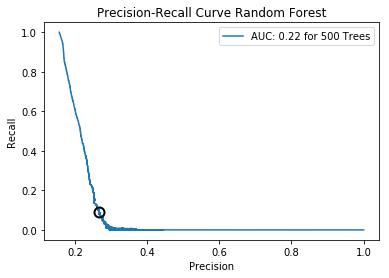

In [29]:
plt.plot(precision, recall, label='AUC: {:.2f} for {} Trees'.format(AUC, 500))
close_default_rf = np.argmin(np.abs(thresholds - 0.5))
plt.plot(precision[close_default_rf], recall[close_default_rf], 'o', c='k',
         markersize=10, fillstyle="none", mew=2)

plt.ylabel('Recall')
plt.xlabel('Precision')
plt.title('Precision-Recall Curve Random Forest')
plt.legend(loc='best')

** The AUC (area under the curve) is 0.22! This is pretty bad! Plus with the Precision-recall curve you want it to be at the top left i.e. Precision and Recall ~1. The main reason for the poor score is that this tutorial used far too few features. Here are a few hints to imporve the model:**
1. Start with the original data set and remove columns (use pd.drop()) that are useless (e.g. id) and dominated by a single value (e.g. application_type) use pd.unique()
2. Feature engineering: e.g. grouping emp_length into categories 